# Import Modules

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
pd.set_option('display.max_columns', None)

# Loading Data

In [7]:
Train=pd.read_csv("Train (1).csv")
Train

,Date,Season,Match_ID,Game_ID,Home Team,Away Team,Score
0,2017-02-15,1,1.0,ID_KAG4KAE9,Antennae,Andromeda,Away win
1,2016-09-14,1,12.0,ID_T7H1XN5Z,Andromeda,Antennae,Draw
2,2016-12-12,1,13.0,ID_O1P9FGN4,Andromeda,Butterfly,Away win
3,2017-01-25,1,14.0,ID_TR5M4KQV,Andromeda,Cigar,Away win
4,2016-08-24,1,15.0,ID_EOIECRE2,Andromeda,Circinus,Home Win
...,...,...,...,...,...,...,...
407,2016-08-28,1,59.0,ID_PREVA6HZ,Sculptor,Medusa Merger,Away win
408,2017-02-19,1,151.0,ID_9DJ219JY,Medusa Merger,Sculptor,Home Win
409,2016-10-23,1,154.0,ID_A1PN23J6,Medusa Merger,Sombrero,Home Win
410,2017-08-16,1,171.0,ID_XFQO60PZ,Milky Way,Sculptor,Draw


In [8]:
Test=pd.read_csv("Test.csv")
Test

,Date,Season,Match_ID,Game_ID,Home Team,Away Team
0,2018-12-08,3,102.0,ID_8518U587,Antennae,Cosmos Redshift 7
1,2018-09-11,3,18.0,ID_H49BIKG7,Cosmos Redshift 7,Tadpole
2,2018-09-25,3,32.0,ID_PO6SP4VA,Cosmos Redshift 7,Medusa Merger
3,2018-10-02,3,40.0,ID_MZRCNBAQ,Cartwheel,Cosmos Redshift 7
4,2018-12-20,3,123.0,ID_CV9VOLIU,Cosmos Redshift 7,Needle
...,...,...,...,...,...,...
229,2018-12-08,3,300.0,ID_QKQ00O16,Malin 1,Needle
230,2018-12-11,3,300.0,ID_172V2IXW,Tadpole,Needle
231,2018-12-22,3,300.0,ID_2ZK5TE39,Circinus,Malin 1
232,2019-05-07,3,300.0,ID_IS54QGW9,Needle,Andromeda


In [9]:
Train_game=pd.read_csv("train_game_statistics.csv")
Train_game

,Game_ID,Player_ID,id,X,Y,Team,Action,Half,Season,Manager,Opposition_Team,Shots,SoT,Goals_scored,Goals_conceded,Accurate passes,Inaccurate passes,Passes,Start_minutes,End_minutes,next_player,next_action,next_x,next_y,event_id,next_team,next_event_id,xt_value
0,ID_ZZKYYPVY,Player_O7HO1NOB,1.0,52.5,34.0,Circinus,Accurate passes,1st half,2,Ryoichi,Backward,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.03,0.37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ID_ZZKYYPVY,Player_O7HO1NOB,2.0,52.5,34.0,Circinus,Positional attacks,1st half,2,Ryoichi,Backward,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.03,0.37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ID_ZZKYYPVY,Player_J0V7B0YE,3.0,37.0,32.7,Circinus,Positional attacks,1st half,2,Ryoichi,Backward,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.05,0.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ID_ZZKYYPVY,Player_J0V7B0YE,4.0,39.5,33.0,Circinus,Positional attacks,1st half,2,Ryoichi,Backward,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ID_ZZKYYPVY,Player_J0V7B0YE,5.0,39.5,33.0,Circinus,Inaccurate passes,1st half,2,Ryoichi,Backward,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.07,0.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1571572,ID_00EFNL7L,Player_30LIPYOT,3454.0,15.3,21.3,Milky Way,Air challenges won,2nd half,1,Masashi,Butterfly,0.0,0.0,0.0,0.0,0.0,0.0,0.0,97.20,97.53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1571573,ID_00EFNL7L,Player_3B44A2GJ,3455.0,88.6,48.7,Butterfly,Positional attacks,2nd half,1,Dante,Milky Way,0.0,0.0,0.0,0.0,0.0,0.0,0.0,97.22,97.55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1571574,ID_00EFNL7L,Player_3B44A2GJ,3456.0,88.6,48.7,Butterfly,Fouls,2nd half,1,Dante,Milky Way,0.0,0.0,0.0,0.0,0.0,0.0,0.0,97.22,97.55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1571575,ID_00EFNL7L,Player_DICH31J8,3457.0,18.1,19.7,Milky Way,Inaccurate passes,2nd half,1,Masashi,Butterfly,0.0,0.0,0.0,0.0,0.0,1.0,1.0,97.77,98.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data Cleaning and EDA

In [10]:
Train.describe()

,Season,Match_ID
count,412.000000,412.000000
mean,1.497573,109.536408
std,0.500602,63.273255
min,1.000000,1.000000
25%,1.000000,54.750000
50%,1.000000,110.000000
75%,2.000000,165.000000
max,2.000000,224.000000


In [11]:
Test.describe()

,Season,Match_ID
count,234.0,234.000000
mean,3.0,126.581197
std,0.0,81.669568
min,3.0,2.000000
25%,3.0,60.250000
50%,3.0,119.500000
75%,3.0,179.750000
max,3.0,300.000000


In [12]:
Train.shape, Test.shape, Train_game.shape

((412, 7), (234, 6), (1571577, 28))

In [13]:
Train_game.isnull().sum()

Game_ID                    0
Player_ID                  0
id                         0
X                          0
Y                          0
Team                       0
Action                     0
Half                       0
Season                     0
Manager                    0
Opposition_Team            0
Shots                      0
SoT                        0
Goals_scored               0
Goals_conceded             0
Accurate passes            0
Inaccurate passes          0
Passes                     0
Start_minutes              0
End_minutes                0
next_player          1571577
next_action          1571577
next_x               1571577
next_y               1571577
event_id             1571577
next_team            1571577
next_event_id        1571577
xt_value             1571577
dtype: int64

In [14]:
#Dropping columns
columns_to_drop = ["next_player", "next_action", "next_x","next_y","event_id","next_team","next_event_id","xt_value"]

Train_game.drop(columns=columns_to_drop, inplace=True)


In [15]:
Train_game

,Game_ID,Player_ID,id,X,Y,Team,Action,Half,Season,Manager,Opposition_Team,Shots,SoT,Goals_scored,Goals_conceded,Accurate passes,Inaccurate passes,Passes,Start_minutes,End_minutes
0,ID_ZZKYYPVY,Player_O7HO1NOB,1.0,52.5,34.0,Circinus,Accurate passes,1st half,2,Ryoichi,Backward,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.03,0.37
1,ID_ZZKYYPVY,Player_O7HO1NOB,2.0,52.5,34.0,Circinus,Positional attacks,1st half,2,Ryoichi,Backward,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.03,0.37
2,ID_ZZKYYPVY,Player_J0V7B0YE,3.0,37.0,32.7,Circinus,Positional attacks,1st half,2,Ryoichi,Backward,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.05,0.38
3,ID_ZZKYYPVY,Player_J0V7B0YE,4.0,39.5,33.0,Circinus,Positional attacks,1st half,2,Ryoichi,Backward,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.40
4,ID_ZZKYYPVY,Player_J0V7B0YE,5.0,39.5,33.0,Circinus,Inaccurate passes,1st half,2,Ryoichi,Backward,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.07,0.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1571572,ID_00EFNL7L,Player_30LIPYOT,3454.0,15.3,21.3,Milky Way,Air challenges won,2nd half,1,Masashi,Butterfly,0.0,0.0,0.0,0.0,0.0,0.0,0.0,97.20,97.53
1571573,ID_00EFNL7L,Player_3B44A2GJ,3455.0,88.6,48.7,Butterfly,Positional attacks,2nd half,1,Dante,Milky Way,0.0,0.0,0.0,0.0,0.0,0.0,0.0,97.22,97.55
1571574,ID_00EFNL7L,Player_3B44A2GJ,3456.0,88.6,48.7,Butterfly,Fouls,2nd half,1,Dante,Milky Way,0.0,0.0,0.0,0.0,0.0,0.0,0.0,97.22,97.55
1571575,ID_00EFNL7L,Player_DICH31J8,3457.0,18.1,19.7,Milky Way,Inaccurate passes,2nd half,1,Masashi,Butterfly,0.0,0.0,0.0,0.0,0.0,1.0,1.0,97.77,98.10


In [16]:
#Merging tables
merged_train = pd.merge(Train, Train_game, on='Game_ID')


In [17]:
merged_train.columns

Index(['Date', 'Season_x', 'Match_ID', 'Game_ID', 'Home Team', 'Away Team',
       'Score', 'Player_ID', 'id', 'X', 'Y', 'Team', 'Action', 'Half',
       'Season_y', 'Manager', 'Opposition_Team', 'Shots', 'SoT',
       'Goals_scored', 'Goals_conceded', 'Accurate passes',
       'Inaccurate passes', 'Passes', 'Start_minutes', 'End_minutes'],
      dtype='object')

In [18]:
merged_train.shape

(1571577, 26)

#### How many games were played in train seasons and test seasons?

In [19]:
merged_train.Game_ID.nunique()

412

In [20]:
Test.Game_ID.nunique()

234

#### How many teams were away and home?

In [ ]:
Train["Home Team"].nunique()

In [ ]:
Train["Away Team"].nunique()

c:\Users\Lindiwe Siteba\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Score', ylabel='count'>

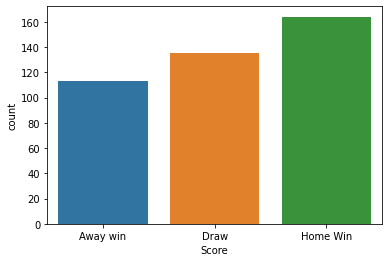

In [21]:
sns.countplot(Train["Score"])

c:\Users\Lindiwe Siteba\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Season', ylabel='count'>

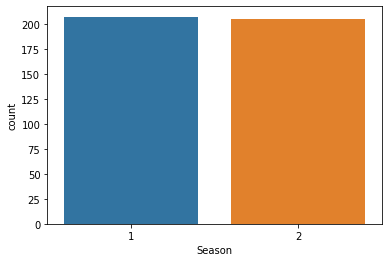

In [22]:
sns.countplot(Train["Season"])

c:\Users\Lindiwe Siteba\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Season', ylabel='count'>

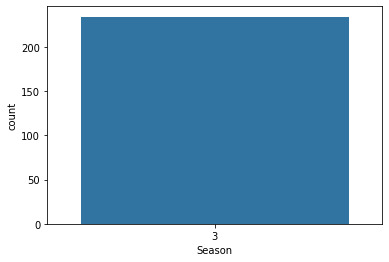

In [23]:
sns.countplot(Test["Season"])

c:\Users\Lindiwe Siteba\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Home Team', ylabel='count'>

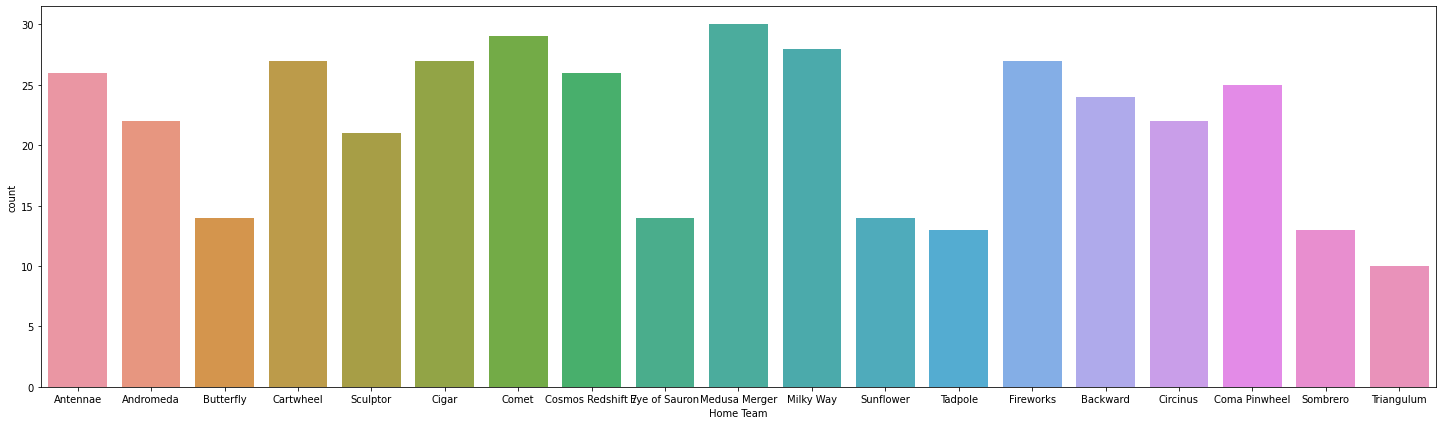

In [24]:
plt.figure(figsize=(25,7))
sns.countplot(Train["Home Team"])


c:\Users\Lindiwe Siteba\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Away Team', ylabel='count'>

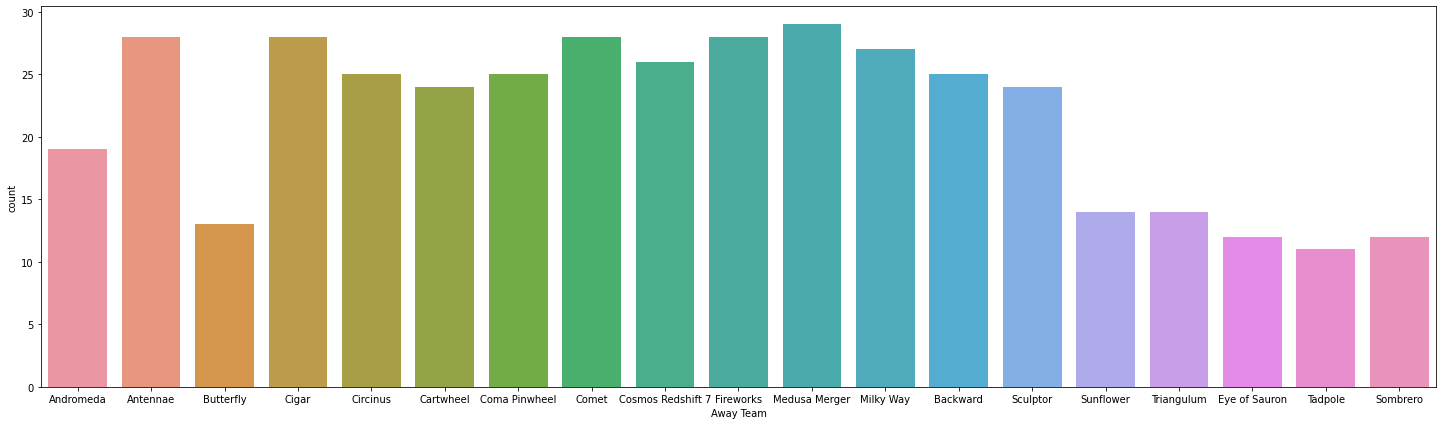

In [25]:
plt.figure(figsize=(25,7))
sns.countplot(Train["Away Team"])

c:\Users\Lindiwe Siteba\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Goals_conceded', ylabel='count'>

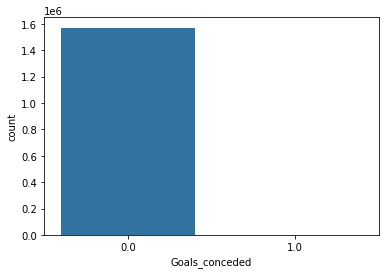

In [26]:
sns.countplot(Train_game["Goals_conceded"])

c:\Users\Lindiwe Siteba\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Accurate passes', ylabel='count'>

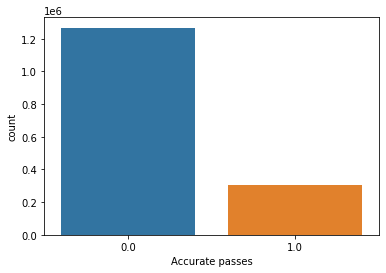

In [27]:
sns.countplot(Train_game["Accurate passes"])

In [28]:


# Extract the relevant columns
home_team = merged_train['Home Team']
accurate_passes = merged_train['Accurate passes']
inaccurate_passes = merged_train['Inaccurate passes']

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(home_team, accurate_passes, label='Accurate passes')
plt.bar(home_team, inaccurate_passes, label='Inaccurate passes')

# Add labels and title
plt.xlabel('Home Team')
plt.ylabel('Passes')
plt.title('Accurate and Inaccurate Passes by Home Team')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Add a legend
plt.legend()

# Show the chart
plt.tight_layout()
plt.show()


In [ ]:


# Group the data by season and calculate the total goals conceded
season_goals = merged_train.groupby('Season_x')['Goals_conceded'].sum().reset_index()

# Sort the data in descending order based on goals conceded
season_goals = season_goals.sort_values(by='Goals_conceded', ascending=False)

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(season_goals['Season_x'], season_goals['Goals_conceded'])

# Add labels and title
plt.xlabel('Season_x')
plt.ylabel('Goals Conceded')
plt.title('Seasons with the Most Conceded Goals')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the chart
plt.tight_layout()
plt.show()
